<a href="https://colab.research.google.com/github/Macostik/ML_cource/blob/main/FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from sklearn.metrics import confusion_matrix
%matplotlib inline
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, MaxPooling2D, Conv2D

## Load data set

In [17]:
# Load Fashion MNIST data set from keras datasets
(X_train,y_train),(X_test,y_test) = tensorflow.keras.datasets.fashion_mnist.load_data()

## Preprocessing data

In [18]:
np.random.seed(42)

In [19]:
print("X train data shape:", X_train.shape, "y train data shape:", y_train.shape)

X train data shape: (60000, 28, 28) y train data shape: (60000,)


In [20]:
print("X test data shape:", X_test.shape, "y test data shape:", y_test.shape)

X test data shape: (10000, 28, 28) y test data shape: (10000,)


In [21]:
print(y_train[:10])

[9 0 0 3 0 2 7 2 5 5]


In [22]:
# Get number of classes
num_classes = len(np.unique(y_train))
print("Number of classes: ", num_classes)

Number of classes:  10


In [23]:
# Helper to convert the class to string format
labels = 'T-shirt/top trouser pullover dress coat sandal shirt sneakers bagankle boot'.split()
print(labels)

['T-shirt/top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneakers', 'bagankle', 'boot']


In [24]:
# Get random element to get info about it
random_number = random_int = np.random.randint(0, len(X_test) - 1)
element = X_train[random_number]
print("Class name: ", labels[y_train[random_number]])
print(element[:1])


Class name:  dress
[[  0   0   0   0   0   0 136 138  57   0   0   0   0   0   0   0   0   0
    0   0  58 133 111   0   0   0   0   0]]


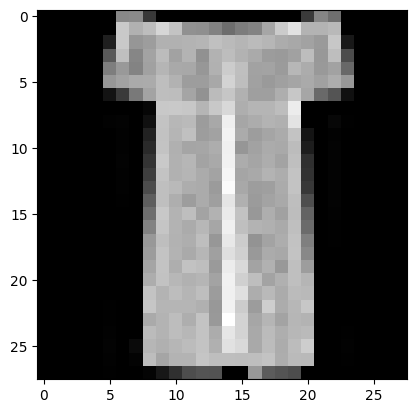

In [25]:
# Visualize random element
plt.imshow(element,cmap='gray')

In [26]:
# Scalling to range [0, 1]
X_train, X_test = X_train / 255, X_test / 255

# Reshape to needed input shape for network
X_train, X_test = X_train.reshape((-1,28,28,1)), X_test.reshape((-1,28,28,1))

In [27]:
element = X_train[random_number]
print("Image height = %d, image width = %d, number of channels = %d"
      %(element.shape[0], element.shape[1], element.shape[2]))
print(element[:1])

Image height = 28, image width = 28, number of channels = 1
[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.53333333]
  [0.54117647]
  [0.22352941]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.22745098]
  [0.52156863]
  [0.43529412]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]]


## Create model

In [28]:
# Instanitiating the model

input_shape = X_train.shape[1:] # Input shape
filters1, filters2, filters3 = 16, 64, 128 # Number of output channels
kernel_size1, kernel_size2, kernel_size3  = (4, 4), (3,3), (2, 2) # Filter shape
pool_size = (2,2) # Max pool size
model = Sequential([
       # First Conv2D layer
        Conv2D(filters = filters1, kernel_size = kernel_size1, activation = 'relu', input_shape = input_shape),
        MaxPooling2D(pool_size = pool_size),

        # Second Conv2D layer
        Conv2D(filters = filters2, kernel_size = kernel_size2, activation = 'relu'),
        MaxPooling2D(pool_size = pool_size),

        # Third Conv2D layer
        Conv2D(filters = filters3, kernel_size = kernel_size3, activation = 'relu'),
        MaxPooling2D(pool_size = pool_size),

        # Flatten and Dense layers
        Flatten(),
        Dense(256, activation='relu'),
        Dense(10, activation='softmax')  # 10 output classes
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 25, 25, 16)          │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 10, 10, 64)          │           9,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 128)           │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 176,346 (688.85 KB)

 Trainable params: 176,346 (688.85 KB)

 Non-trainable params: 0 (0.00 B)

## Train model

In [29]:
# Hyperparameters
training_epochs = 20 # Total number of training epochs
batch_size = 32 # The learning rate
validation_split=0.2 # Split part of data set

# Configure TensorBoard callback
tensorboard_callback = keras.callbacks.TensorBoard(log_dir="./logs")

# Train the model
history = model.fit(
    X_train,
    y_train,
    epochs = training_epochs,
    batch_size = batch_size,
    validation_split = validation_split,
    callbacks = [tensorboard_callback]
)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 63s 36ms/step - accuracy: 0.7224 - loss: 0.7618 - val_accuracy: 0.8564 - val_loss: 0.3952
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 75s 31ms/step - accuracy: 0.8697 - loss: 0.3581 - val_accuracy: 0.8811 - val_loss: 0.3322
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 30ms/step - accuracy: 0.8890 - loss: 0.3001 - val_accuracy: 0.8960 - val_loss: 0.2856
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 85s 32ms/step - accuracy: 0.9031 - loss: 0.2614 - val_accuracy: 0.8970 - val_loss: 0.2846
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 48s 32ms/step - accuracy: 0.9093 - loss: 0.2446 - val_accuracy: 0.8977 - val_loss: 0.2825
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 45s 30ms/step - accuracy: 0.9181 - loss: 0.2182 - val_accuracy: 0.9030 - val_loss: 0.2717
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 84s 32ms/step - accuracy: 0.9270 - loss: 0.1992 - val_accuracy: 0.9051 - val_loss: 0.2691
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 30ms/step - accuracy: 0.9336 -

## Evaluate model

In [30]:
print("Evaluating on training set...")
(loss, accuracy) = model.evaluate(X_train,y_train, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))


print("Evaluating on testing set...")
(loss, accuracy) = model.evaluate(X_test, y_test, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

Evaluating on training set...
loss=0.1259, accuracy: 96.6600%
Evaluating on testing set...
loss=0.4825, accuracy: 90.1600%


Text(0, 0.5, 'Accuracy')

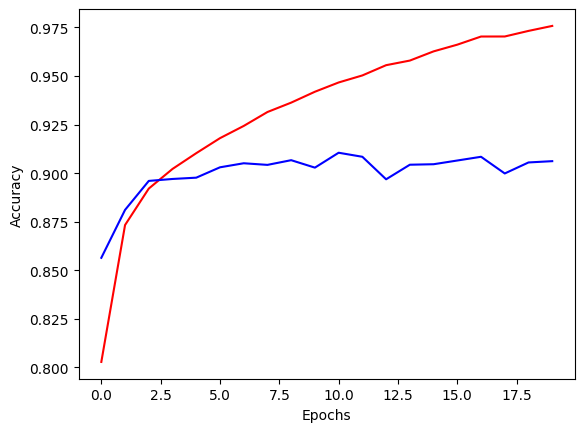

In [36]:
# Plot model's accuracy value
plt.plot(history.history['accuracy'],'red')
plt.plot(history.history['val_accuracy'],'blue')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

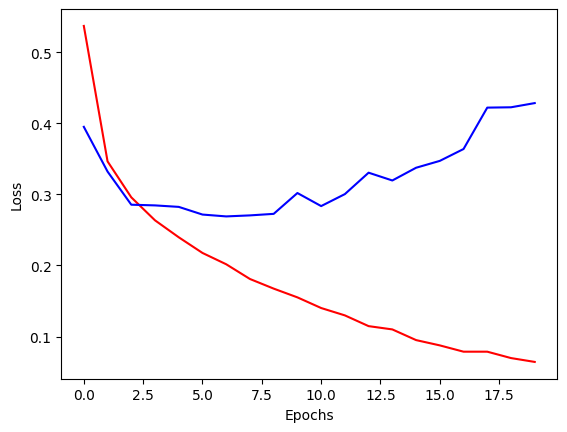

In [32]:
# Plot model's loss value
plt.plot(history.history['loss'],'red')
plt.plot(history.history['val_loss'],'blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')

## Predict value


In [33]:
# Predicted probability
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print(f"Softmax predicted probability: {y_pred}")
print(f"Probability based answer: {y_pred_classes}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step
Softmax predicted probability: [[1.63286116e-14 9.77910027e-13 1.07936875e-10 ... 4.91404677e-08
  6.77044887e-14 9.99999821e-01]
 [3.93484800e-09 2.63925054e-19 9.99999940e-01 ... 1.30347982e-30
  4.04827527e-18 3.32577514e-36]
 [4.64655640e-35 9.99999940e-01 1.17409199e-31 ... 0.00000000e+00
  7.74623769e-29 5.30941448e-33]
 ...
 [3.55014166e-21 2.05234934e-25 1.43176235e-29 ... 2.33702585e-33
  9.99999940e-01 3.67486277e-33]
 [1.09265171e-23 9.99999940e-01 4.08199206e-16 ... 2.92409414e-26
  3.28200195e-15 4.89889446e-20]
 [2.13895123e-06 3.69990739e-11 4.08988156e-11 ... 8.36089194e-01
  1.31024399e-05 1.00138313e-05]]
Probability based answer: [9 2 1 ... 8 1 7]


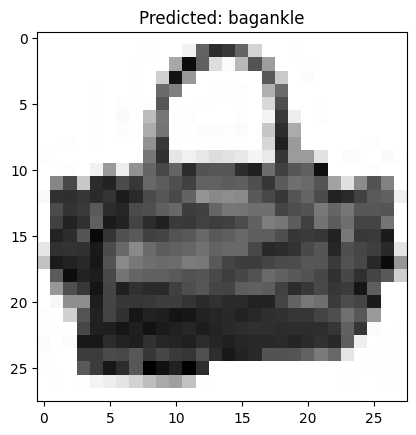

In [37]:
# Select the random element from the data set
random_num = np.random.choice(len(X_test))
X_sample = X_test[random_num]

# Target value
y_sample_true = y_test[random_num]

# Predicted class
y_sample_pred_class = y_pred_classes[random_num]

plt.title(f"Predicted: {labels[y_sample_pred_class]}")
plt.imshow(X_sample.reshape(28, 28), cmap="Greys");

Text(0.5, 1.0, 'Confusion Matrix')

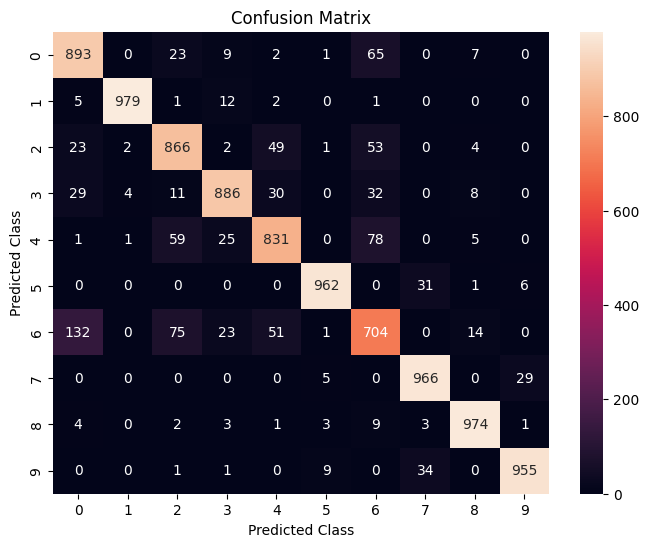

In [35]:
# PLot confusion matrix
confusion_mtx = confusion_matrix(y_test, y_pred_classes)

fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.heatmap(confusion_mtx, annot=True, fmt="d", ax=ax)
ax.set_xlabel("Predicted Class")
ax.set_ylabel("Predicted Class")
ax.set_title("Confusion Matrix")

## Conclusion:


We successfully experimented with the Fashion MNIST dataset, achieving promising results. The model was able to make accurate predictions, and a random sample prediction confirmed its correctness. However, based on the accuracy and loss plots, overfitting began to occur after just two epochs. To address this, we plan to explore hyperparameter tuning, implement regularization techniques, and potentially introduce dropout layers to improve the model’s generalization.
The confusion matrix revealed that the model predicts the “Sandal” category with lower accuracy, possibly because it visually resembles the “Boots” category. While the overall test accuracy of 90% is a solid starting point, we are confident that further optimization can enhance class-specific performance and overall results. With additional fine-tuning and experimentation, we aim to achieve even greater success.